All follow the eigenvector with biggest eigvalue, because matrix to the power of 100 lets all the other approach 0, while this one stays constant

In [1]:
# After 100 steps
from tools import simulate, inital_state_delta, inital_state_random, generate_matrix_simple
import matplotlib.pyplot as plt

In [2]:
# Parameter
nodes = 21
starting_x = 10
connections = [-2,-1,1,2]
steps = 100

In [3]:
# generate matrix
t_matrix = generate_matrix_simple(nodes,connections)

In [4]:
# generate inital states
inital_states = {
"delta": inital_state_delta(nodes,delta_x=starting_x),
"random_1": inital_state_random(nodes),
"random_2": inital_state_random(nodes),
}

In [5]:
# run simulation
time_devs = {}

for name, inital_state in inital_states.items():
    time_devs[name] = simulate(t_matrix,inital_state,steps)

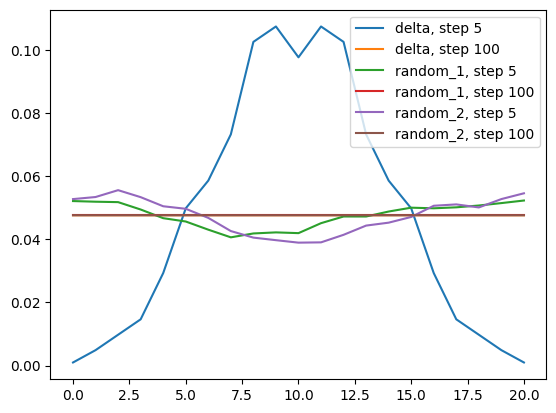

In [6]:
i_start = 5
i_end = 100
for name, time_dev in time_devs.items():
    plt.plot(time_dev[i_start],label=f"{name}, step {i_start}")
    plt.plot(time_dev[i_end],label=f"{name}, step {i_end}")

plt.legend()
plt.show()